# **Organización de Datos 75.06 - Trabajo Práctico N°1**
Visualizaciones - Spotify

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1/csv/spotify.csv")

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Cantidad de días')

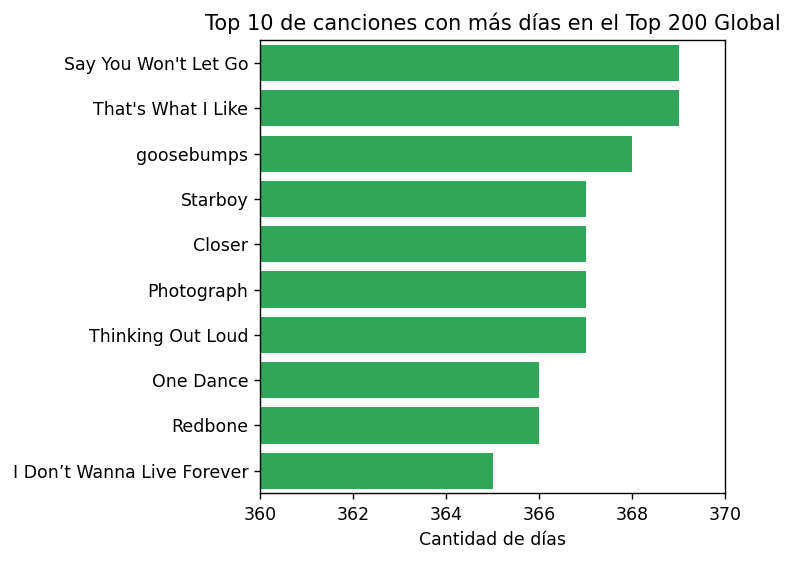

In [2]:
#Queremos el Top 10 de canciones con más días en el Top 200 Global (top diario).

spotify = df[ ['Position', 'Track Name', 'Artist', 'Region'] ]
spotify = spotify[ spotify['Region'] == 'global' ] #Filtramos por Top 200 GLOBAL.

top10canciones = dict(spotify['Track Name'].value_counts().nlargest(10))

top10 = spotify[spotify['Track Name'].isin(top10canciones)].drop_duplicates(subset=['Track Name'])
top10['Days'] = top10['Track Name'].map(top10canciones)
top10 = top10.sort_values('Days', ascending = False).reset_index()
top10['Track Name'][9] = 'I Don’t Wanna Live Forever'

plt.figure(dpi=125,figsize=(4.8, 4.8))
sns.barplot(data=top10, x='Days', y='Track Name', palette=['#1DB954'])
plt.xlim(360, 370)
plt.title("Top 10 de canciones con más días en el Top 200 Global")
plt.ylabel('')
plt.xlabel('Cantidad de días')

Text(0.5, 1.0, 'Distribución de las reproducciones del Top 200 por mes en Argentina')

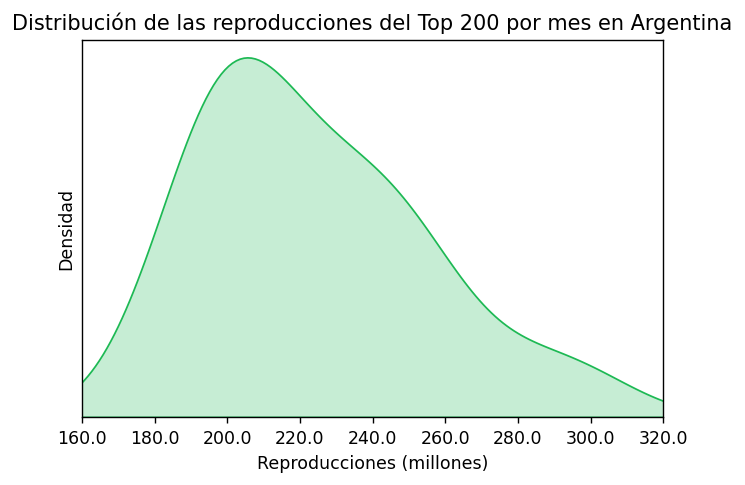

In [3]:
#Queremos la suma de reproducciones del Top 200 para cada mes de 2017 en Argentina.

spotify = df[ ['Track Name', 'Artist', 'Streams', 'Date', 'Region'] ]
spotify = spotify[ spotify['Region'] == 'ar' ] #Filtramos por Top 200 ARGENTINA.
spotify = spotify[ ~spotify['Date'].str.contains('|'.join(['2018'])) ] #Eliminamos enero de 2018 (solo queremos enero 2017)
spotify['Date'] = spotify['Date'].map(lambda x: x.split('-')[1])

plt.figure(dpi=125)
graf = sns.kdeplot(spotify.groupby('Date')['Streams'].sum(), fill=True, color='#1DB954')
plt.xlim((160000000, 320000000))
plt.yticks([])
plt.xticks(graf.get_xticks(), graf.get_xticks() / 1000000)
plt.ylabel("Densidad")
plt.xlabel("Reproducciones (millones)")
plt.title("Distribución de las reproducciones del Top 200 por mes en Argentina")